In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('bounceExit.csv')

In [79]:
cd=df['ExitRates'].notna()
dfr=df.loc[cd,['BounceRates','ExitRates']]
X=dfr['BounceRates']
Y=dfr['ExitRates']
X.shape[0]
# dfr.head()
# # plt.scatter(x,y)

8199

In [80]:
dfr['BounceRates'].describe()

count    8199.000000
mean        0.021594
std         0.047193
min         0.000000
25%         0.000000
50%         0.003774
75%         0.016667
max         0.200000
Name: BounceRates, dtype: float64

In [84]:
from lmfit import Parameters, Minimizer, Model
from scipy import constants
from matplotlib import rcParams

def inter2(x,a2,b2,c2,data=None):
    model=(a2*x+b2)**0.5+c2
    if data is None:
        return model
    else:
        return model-data

# Crear un objeto Model
modelo = Model(inter2)

# Crear parámetros iniciales
params = modelo.make_params(a2=0.1, b2=0.0005, c2=0.004)

# Ajustar el modelo a los datos
res = modelo.fit(Y, params, x=X)

# Coeficientes de la regresion
a2,b2,c2=[res.params['a2'].value,res.params['b2'].value,res.params['c2'].value]
# Errores en los Coeficientes de la regresion
sa2,sb2,sc2=[res.params['a2'].stderr,res.params['b2'].stderr,res.params['c2'].stderr]

print(f'a2 = {a2}, b2 = {b2}, c2 = {c2}')
print(f'sa2 = ± {sa2}, sb2 = ± {sb2}, sc2 = ± {sc2}')
res

a2 = 0.6097148667370242, b2 = 0.05961379401047612, c2 = -0.22372361709172728
sa2 = ± 0.03757581189258332, sb2 = ± 0.009704849124978243, sc2 = ± 0.01973893237158304


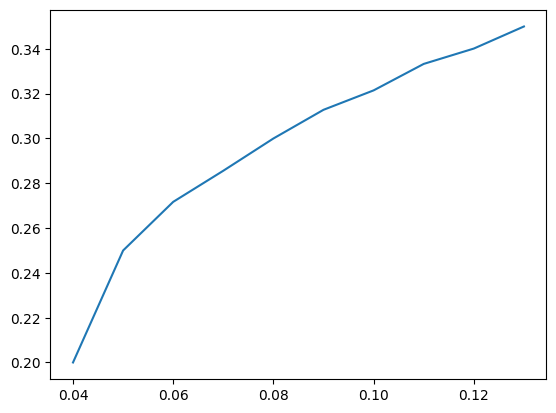

In [68]:
X=np.array([0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13])

Y=np.array([0.2, 0.25 , 0.27171068,0.28560254, 0.3,
       0.3128034 , 0.32147449, 0.33328757, 0.34014213, 0.35])
# Y=np.sqrt(X/4-0.01)+0.2
# Y
plt.plot(X,Y)


In [85]:
import pandas as pd

# Crear un DataFrame de ejemplo
datos = pd.DataFrame({
    'ID': [1, 2, 3, 4],
    'Fruta': ['Manzana', 'Plátano', 'Manzana', 'Fresa']
})

print("DataFrame original:")
print(datos)

# Aplicar codificación one-hot a la columna 'Fruta'
datos = pd.get_dummies(datos, columns=['Fruta'])

print("\nDataFrame después de la codificación one-hot:")
print(datos)

DataFrame original:
   ID    Fruta
0   1  Manzana
1   2  Plátano
2   3  Manzana
3   4    Fresa

DataFrame después de la codificación one-hot:
   ID  Fruta_Fresa  Fruta_Manzana  Fruta_Plátano
0   1        False           True          False
1   2        False          False           True
2   3        False           True          False
3   4         True          False          False
